In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We've talked about Random Forests. Now it's time to build one.

Here we'll use data from Lending Club to predict the state of a loan given some information about it. You can find the dataset [here](https://www.lendingclub.com/info/download-data.action). We'll use 2015 data. ([Thinkful mirror](https://www.dropbox.com/s/m7z42lubaiory33/LoanStats3d.csv?dl=0))

In [2]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    header=1
)

# Note the warning about dtypes.

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id: 421097
term: 2
int_rate: 110
grade: 7
sub_grade: 35
emp_title: 120812
emp_length: 11
home_ownership: 4
verification_status: 3
issue_d: 12
loan_status: 7
pymnt_plan: 1
url: 421095
desc: 34
purpose: 14
title: 27
zip_code: 914
addr_state: 49
earliest_cr_line: 668
revol_util: 1211
initial_list_status: 2
last_pymnt_d: 25
next_pymnt_d: 4
last_credit_pull_d: 26
application_type: 2
verification_status_joint: 3


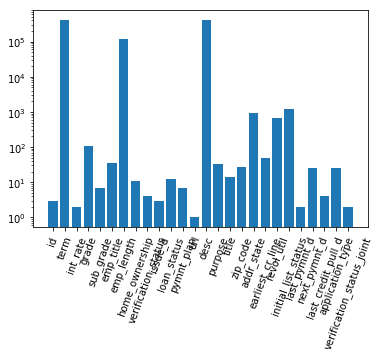

In [10]:
categorical = y2015.select_dtypes(include=['object'])
name = []
val = []
for i in categorical:
    name.append(i)
    val.append(column.nunique())
    column = categorical[i]
    
    print(f'{i}: {column.nunique()}')

plt.bar(name, val, log=True)
plt.xticks(rotation=70)
plt.show()

Well that right there is what's called a problem. Some of these have over a hundred thousand distinct types. Lets drop the ones with over 30 unique values, converting to numeric where it makes sense. In doing this there's a lot of code that gets written to just see if the numeric conversion makes sense. It's a manual process that we'll abstract away and just include the conversion.

You could extract numeric features from the dates, but here we'll just drop them. There's a lot of data, it shouldn't be a huge problem.

In [11]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

Wonder what was causing the dtype error on the id column, which _should_ have all been integers? Let's look at the end of the file.

In [12]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

Now this should be better. Let's try again.

In [13]:
pd.get_dummies(y2015)

id   member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0       68009401.0  72868139.0    16000.0      16000.0          16000.0   
1       68354783.0  73244544.0     9600.0       9600.0           9600.0   
2       68466916.0  73356753.0    25000.0      25000.0          25000.0   
3       68466961.0  73356799.0    28000.0      28000.0          28000.0   
4       68495092.0  73384866.0     8650.0       8650.0           8650.0   
5       68506798.0  73396623.0    23000.0      23000.0          23000.0   
6       68566886.0  73456723.0    29900.0      29900.0          29900.0   
7       68577849.0  73467703.0    18000.0      18000.0          18000.0   
8       66310712.0  71035433.0    35000.0      35000.0          35000.0   
9       68476807.0  73366655.0    10400.0      10400.0          10400.0   
10      68341763.0  72928789.0    20000.0      20000.0          20000.0   
11      68356421.0  73246236.0    22400.0      22400.0          22400.0   
12      68426545.0  73316365.0    16000.0      16000.0          16000.0   
13      68407277.0  73297111.0     3600.0       3600.0           3600.0   
14      68355089.0  73244858.0    24700.0      24700.0          24700.0   
15      68466926.0  73356763.0    10000.0      10000.0          10000.0   
16      68338832.0  73542831.0     1400.0       1400.0           1400.0   
17      68426831.0  73316657.0    11950.0      11950.0          11950.0   
18      66624733.0  71350547.0    18000.0      18000.0          18000.0   
19      68616873.0  73519699.0     8000.0       8000.0           8000.0   
20      67275481.0  72077199.0    20000.0      20000.0          20000.0   
21      68476668.0  73366513.0    20000.0      20000.0          20000.0   
22      68476702.0  73366548.0    28000.0      28000.0          28000.0   
23      68436666.0  73326493.0     5000.0       5000.0           5000.0   
24      68596180.0  73485987.0    20000.0      20000.0          20000.0   
25      67849662.0  72708407.0     4225.0       4225.0           4225.0   
26      68526883.0  73416719.0    15000.0      15000.0          15000.0   
27      68607141.0  73509983.0    17600.0      17600.0          17600.0   
28      68476715.0  73366561.0     6000.0       6000.0           6000.0   
29      67715283.0  72569997.0    16000.0      16000.0          16000.0   
...            ...         ...        ...          ...              ...   
421065  36631385.0  39374138.0    13000.0      13000.0          13000.0   
421066  36231083.0  38942474.0    15000.0      15000.0          15000.0   
421067  36691397.0  39434133.0    20000.0      20000.0          20000.0   
421068  36743377.0  39486112.0     4200.0       4200.0           4200.0   
421069  36331554.0  39042967.0    26950.0      26950.0          26950.0   
421070  36460697.0  39182359.0    23000.0      23000.0          23000.0   
421071  35773415.0  38468842.0    18700.0      18700.0          18700.0   
421072  36250801.0  38962184.0     6000.0       6000.0           6000.0   
421073  36371802.0  39103231.0    15000.0      15000.0          15000.0   
421074  36440728.0  39152101.0    25000.0      25000.0          25000.0   
421075  36361815.0  39093260.0    26500.0      26500.0          26500.0   
421076  35591131.0  38288343.0    25000.0      25000.0          25000.0   
421077  36201871.0  38913321.0    21000.0      21000.0          21000.0   
421078  36381756.0  39013193.0     8000.0       8000.0           8000.0   
421079  36231724.0  38943173.0    12000.0      12000.0          12000.0   
421080  36301729.0  39023153.0    10000.0      10000.0          10000.0   
421081  36250208.0  38961532.0    13150.0      13150.0          13150.0   
421082  36241316.0  38952731.0     6225.0       6225.0           6225.0   
421083  36231718.0  38943165.0    10775.0      10775.0          10775.0   
421084  36381704.0  39013139.0     7000.0       7000.0           7000.0   
421085  36421485.0  39142898.0     4000.0       4000.0           4000.0   
421086  35094480.0  37777829.0     7500.0

It finally works! We had to sacrifice sub grade, state address and description, but that's fine. If you want to include them you could run the dummies independently and then append them back to the dataframe.

## Second Attempt

Now let's try this model again.

We're also going to drop NA columns, rather than impute, because our data is rich enough that we can probably get away with it.

This model may take a few minutes to run.

In [14]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

array([0.97850918, 0.979839  , 0.98147752, 0.98180998, 0.97437663,
       0.97632391, 0.96596927, 0.98064547, 0.97929085, 0.98085783])

The score cross validation reports is the accuracy of the tree. Here we're about 98% accurate.

That works pretty well, but there are a few potential problems. Firstly, we didn't really do much in the way of feature selection or model refinement. As such there are a lot of features in there that we don't really need. Some of them are actually quite impressively useless.

There's also some variance in the scores. The fact that one gave us only 93% accuracy while others gave higher than 98 is concerning. This variance could be corrected by increasing the number of estimators. That will make it take even longer to run, however, and it is already quite slow.

## DRILL: Third Attempt

So here's your task. Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation.

You'll want to do a few things in this process. First, dive into the data that we have and see which features are most important. This can be the raw features or the generated dummies. You may want to use PCA or correlation matrices.

Can you do it without using anything related to payment amount or outstanding principal? How do you know?

In [35]:
y2015.head(10)
# y2015.term.describe()

id   member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0  68009401.0  72868139.0    16000.0      16000.0          16000.0   
1  68354783.0  73244544.0     9600.0       9600.0           9600.0   
2  68466916.0  73356753.0    25000.0      25000.0          25000.0   
3  68466961.0  73356799.0    28000.0      28000.0          28000.0   
4  68495092.0  73384866.0     8650.0       8650.0           8650.0   
5  68506798.0  73396623.0    23000.0      23000.0          23000.0   
6  68566886.0  73456723.0    29900.0      29900.0          29900.0   
7  68577849.0  73467703.0    18000.0      18000.0          18000.0   
8  66310712.0  71035433.0    35000.0      35000.0          35000.0   
9  68476807.0  73366655.0    10400.0      10400.0          10400.0   

         term  int_rate  installment grade emp_length  \
0   60 months     14.85       379.39     C  10+ years   
1   36 months      7.49       298.58     A    8 years   
2   36 months      7.49       777.55     A  10+ years   
3   36 months      6.49       858.05     A  10+ years   
4   36 months     19.89       320.99     E    8 years   
5   60 months      8.49       471.77     B    5 years   
6   60 months     12.88       678.49     C  10+ years   
7   60 months     11.99       400.31     C  10+ years   
8   60 months     14.85       829.90     C  10+ years   
9   60 months     22.45       289.91     F    3 years   

              ...             num_tl_90g_dpd_24m  num_tl_op_past_12m  \
0             ...                            0.0                 2.0   
1             ...                            0.0                 2.0   
2             ...                            0.0                 0.0   
3             ...                            0.0                 0.0   
4             ...                            0.0                12.0   
5             ...                            0.0                 2.0   
6             ...                            0.0                 4.0   
7             ...                            0.0                 4.0   
8             ...                            0.0                 1.0   
9             ...                            0.0                 4.0   

  pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens  \
0           78.9              0.0                  0.0       2.0   
1          100.0             66.7                  0.0       0.0   
2          100.0             20.0                  0.0       0.0   
3           91.7             22.2                  0.0       0.0   
4          100.0             50.0                  1.0       0.0   
5           87.9             14.3                  0.0       0.0   
6          100.0             25.0                  0.0       0.0   
7          100.0              0.0                  0.0       0.0   
8          100.0              0.0                  0.0       0.0   
9           96.6             60.0                  0.0       0.0   

  tot_hi_cred_lim total_bal_ex_mort  total_bc_limit  \
0        298100.0           31329.0        281300.0   
1         88635.0           55387.0         12500.0   
2        373572.0           68056.0         38400.0   
3        304003.0           74920.0         41500.0   
4         38998.0           18926.0          2750.0   
5         93962.0           63886.0         39500.0   
6        271700.0           42497.0         34000.0   
7        309710.0           36127.0         69800.0   
8        381215.0           52226.0         62500.0   
9        439570.0           95768.0         20300.0   

   total_il_high_credit_limit  
0                     13400.0  
1                     75635.0  
2                     82117.0  
3                     42503.0  
4                     18248.0  
5                     46662.0  
6                     15574.0  
7                     26210.0  
8                     18000.0  
9                     88097.0  

[10 rows x 103 columns]

                                      id  member_id  loan_amnt  funded_amnt  \
id                              1.000000   0.997540  -0.008288    -0.008288   
member_id                       0.997540   1.000000  -0.008620    -0.008620   
loan_amnt                      -0.008288  -0.008620   1.000000     1.000000   
funded_amnt                    -0.008288  -0.008620   1.000000     1.000000   
funded_amnt_inv                -0.008554  -0.008885   0.999994     0.999994   
int_rate                       -0.053402  -0.053447   0.140572     0.140572   
installment                    -0.012919  -0.013274   0.941205     0.941205   
annual_inc                      0.015055   0.014958   0.305734     0.305734   
dti                             0.005692   0.005806   0.006103     0.006103   
delinq_2yrs                     0.002300   0.002261  -0.010424    -0.010424   
inq_last_6mths                  0.000660   0.000715  -0.039040    -0.039040   
mths_since_last_delinq          0.006322   0.006186 

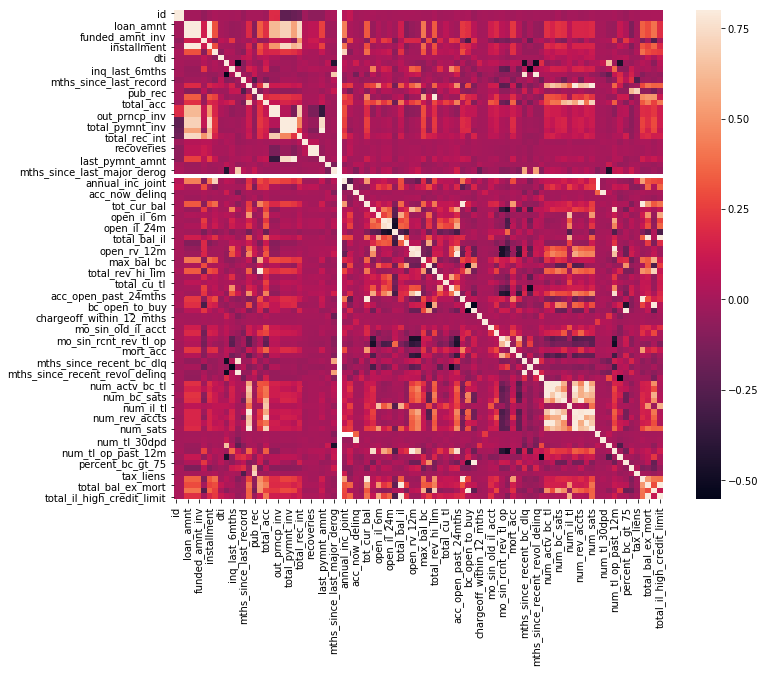

In [59]:
# Make the correlation matrix.
corrmat = y2015.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

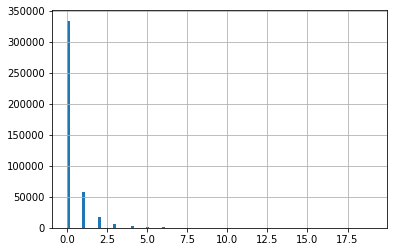

In [47]:
y2015[y2015['delinq_2yrs'] < 20]['delinq_2yrs'].hist(bins=100)

In [52]:
# y2015.loan_status.describe()
# droppable_cols = ['member_id', ]
# df.drop(columns=['B', 'C'])
[print(c) for c in y2015.columns]

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
purpose
title
dti
delinq_2yrs
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [55]:
y2015.emp_length.describe()

count        397278
unique           11
top       10+ years
freq         141521
Name: emp_length, dtype: object

## Identifying unneeded Columns
### QUESTION: how to unneeded columns?
I can think of several methods
- low/no info: ie id or just not useful
- low/no correlation
- redundant with other variables

I honestly am not trying to take a ton of time to go through the data, and so instead just used PCA.

In [54]:
with pd.option_context('display.max_columns', None):
    display(y2015)

id   member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0       68009401.0  72868139.0    16000.0      16000.0          16000.0   
1       68354783.0  73244544.0     9600.0       9600.0           9600.0   
2       68466916.0  73356753.0    25000.0      25000.0          25000.0   
3       68466961.0  73356799.0    28000.0      28000.0          28000.0   
4       68495092.0  73384866.0     8650.0       8650.0           8650.0   
5       68506798.0  73396623.0    23000.0      23000.0          23000.0   
6       68566886.0  73456723.0    29900.0      29900.0          29900.0   
7       68577849.0  73467703.0    18000.0      18000.0          18000.0   
8       66310712.0  71035433.0    35000.0      35000.0          35000.0   
9       68476807.0  73366655.0    10400.0      10400.0          10400.0   
10      68341763.0  72928789.0    20000.0      20000.0          20000.0   
11      68356421.0  73246236.0    22400.0      22400.0          22400.0   
12      68426545.0  73316365.0    16000.0      16000.0          16000.0   
13      68407277.0  73297111.0     3600.0       3600.0           3600.0   
14      68355089.0  73244858.0    24700.0      24700.0          24700.0   
15      68466926.0  73356763.0    10000.0      10000.0          10000.0   
16      68338832.0  73542831.0     1400.0       1400.0           1400.0   
17      68426831.0  73316657.0    11950.0      11950.0          11950.0   
18      66624733.0  71350547.0    18000.0      18000.0          18000.0   
19      68616873.0  73519699.0     8000.0       8000.0           8000.0   
20      67275481.0  72077199.0    20000.0      20000.0          20000.0   
21      68476668.0  73366513.0    20000.0      20000.0          20000.0   
22      68476702.0  73366548.0    28000.0      28000.0          28000.0   
23      68436666.0  73326493.0     5000.0       5000.0           5000.0   
24      68596180.0  73485987.0    20000.0      20000.0          20000.0   
25      67849662.0  72708407.0     4225.0       4225.0           4225.0   
26      68526883.0  73416719.0    15000.0      15000.0          15000.0   
27      68607141.0  73509983.0    17600.0      17600.0          17600.0   
28      68476715.0  73366561.0     6000.0       6000.0           6000.0   
29      67715283.0  72569997.0    16000.0      16000.0          16000.0   
...            ...         ...        ...          ...              ...   
421065  36631385.0  39374138.0    13000.0      13000.0          13000.0   
421066  36231083.0  38942474.0    15000.0      15000.0          15000.0   
421067  36691397.0  39434133.0    20000.0      20000.0          20000.0   
421068  36743377.0  39486112.0     4200.0       4200.0           4200.0   
421069  36331554.0  39042967.0    26950.0      26950.0          26950.0   
421070  36460697.0  39182359.0    23000.0      23000.0          23000.0   
421071  35773415.0  38468842.0    18700.0      18700.0          18700.0   
421072  36250801.0  38962184.0     6000.0       6000.0           6000.0   
421073  36371802.0  39103231.0    15000.0      15000.0          15000.0   
421074  36440728.0  39152101.0    25000.0      25000.0          25000.0   
421075  36361815.0  39093260.0    26500.0      26500.0          26500.0   
421076  35591131.0  38288343.0    25000.0      25000.0          25000.0   
421077  36201871.0  38913321.0    21000.0      21000.0          21000.0   
421078  36381756.0  39013193.0     8000.0       8000.0           8000.0   
421079  36231724.0  38943173.0    12000.0      12000.0          12000.0   
421080  36301729.0  39023153.0    10000.0      10000.0          10000.0   
421081  36250208.0  38961532.0    13150.0      13150.0          13150.0   
421082  36241316.0  38952731.0     6225.0       6225.0           6225.0   
421083  36231718.0  38943165.0    10775.0      10775.0          10775.0   
421084  36381704.0  39013139.0     7000.0       7000.0           7000.0   
421085  36421485.0  39142898.0     4000.0       4000.0           4000.0   
421086  35094480.0  37777829.0     7500.0

## PCA
### question: I components > 1 seem to have so little explanatory power, why did using 20 vs 4 components provide a significant boost to its predictive power?

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [9.98422960e-01 1.22397239e-03 2.95771663e-04 2.43682199e-05
 1.54469675e-05 9.52714834e-06 3.34773664e-06 1.54726083e-06
 1.10567210e-06 6.79625340e-07 5.30949806e-07 3.25541289e-07
 2.77630883e-07 6.94555901e-08 3.11122011e-08 2.60021663e-08
 8.21406456e-09 3.17247436e-09 9.53549613e-10 4.21846105e-11]


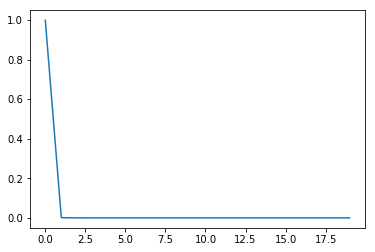

In [31]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=20)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)
plt.plot(sklearn_pca.explained_variance_ratio_)

In [33]:
_X = sklearn_pca.transform(X)

In [23]:
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X).dropna(axis=1)

In [34]:
cross_val_score(rfc, _X, Y, cv=3)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.73916946, 0.92786663, 0.9056874 ])

# 3.2.6 Challenge: If a tree falls in the forest...
ick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to __match that with the simplest random forest you can__. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.

## Random Forest time: _70 seconds_

In [73]:
import time
start_time = time.time()
cross_val_score(rfc, _X, Y, cv=3)
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


--- 69.39569306373596 seconds ---


## Decision Tree time: _seconds_

In [77]:
# This is the model we'll be using.
from sklearn import tree
# A convenience for displaying visualizations.
from IPython.display import Image
# Packages for rendering our tree.
import pydotplus
# import graphviz


# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(_X, Y)

# # Render our tree.
# dot_data = tree.export_graphviz(
#     decision_tree, out_file=None,
#     feature_names=customers.columns,
#     class_names=True,
#     filled=True
# )
# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1337, splitter='best')

In [78]:
import time
start_time = time.time()
cross_val_score(decision_tree, _X, Y, cv=3)
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.234969139099121 seconds ---
